In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
% pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [2]:
# 参数
gamma = 0.5 # 折现率
rewardSize = -1
gridSize = 4
alpha = 0.5
terminationStates = [[0,0],[gridSize-1,gridSize-1]]
actions = [[-1,0],[1,0],[0,1],[0,-1]]
numIterations = 10000

In [3]:
# 初始化
V = np.zeros((gridSize,gridSize))
returns = {(i,j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i,j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i,j] for i in range(gridSize) for j in range(gridSize)]

In [6]:
# utils
def generateInitialState():
    initState = random.choice(states[1:-1])
    return initState
def generateNextAction():
    return random.choice(actions)
def takeAction(state,action):
    if list(state) in terminationStates:
        return 0,None
    finalState = np.array(state) + np.array(action)
    if -1 in list(finalState) or gridSize in list(finalState):
        finalState = state
    return rewardSize,list(finalState)

In [7]:
for it in tqdm(range(numIterations)):
    state = generateInitialState()
    while True:
        action = generateNextAction()
        reward,finalState = takeAction(state,action)
        # 我们到了终点
        if finalState is None:
            break
        # 修改Value函数
        before = V[state[0],state[1]]        
        V[state[0], state[1]] += alpha*(reward + gamma*V[finalState[0], finalState[1]] - V[state[0], state[1]])
        deltas[state[0], state[1]].append(float(np.abs(before-V[state[0], state[1]])))
        state = finalState

100%|██████████████████████████████████| 10000/10000 [00:03<00:00, 3176.32it/s]


In [8]:
V

array([[ 0.        , -1.30171252, -1.96704439, -1.97737594],
       [-1.42405036, -1.81141915, -1.97278623, -1.9852595 ],
       [-1.95279276, -1.97983847, -1.99363536, -1.70358513],
       [-1.99063104, -1.9275035 , -1.71342671,  0.        ]])

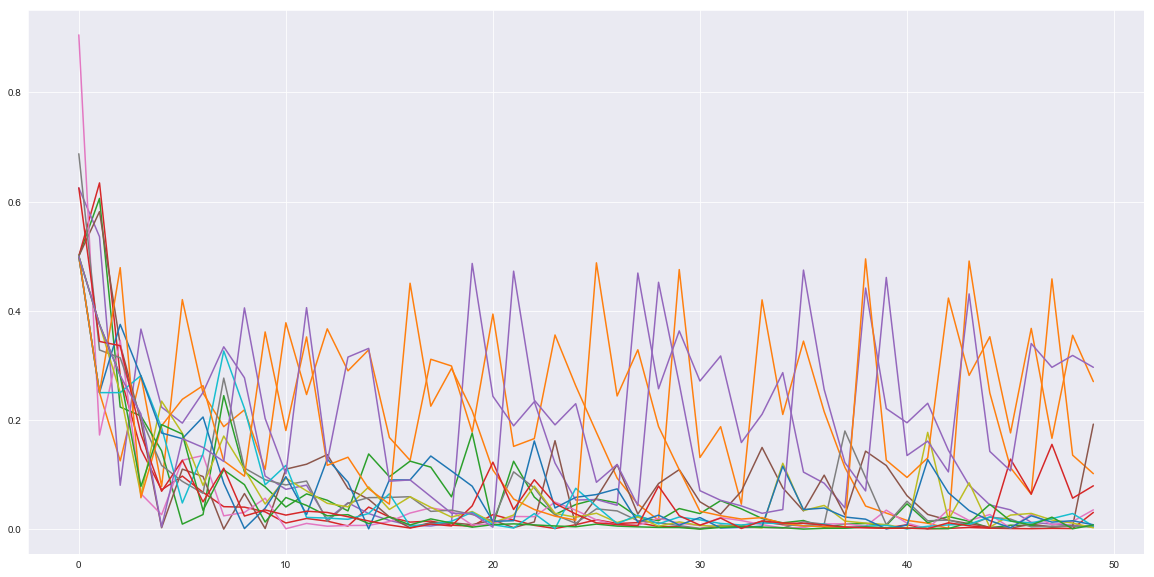

In [9]:
# gamma=0.1 alpha = 0.1
plt.figure(figsize = (20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

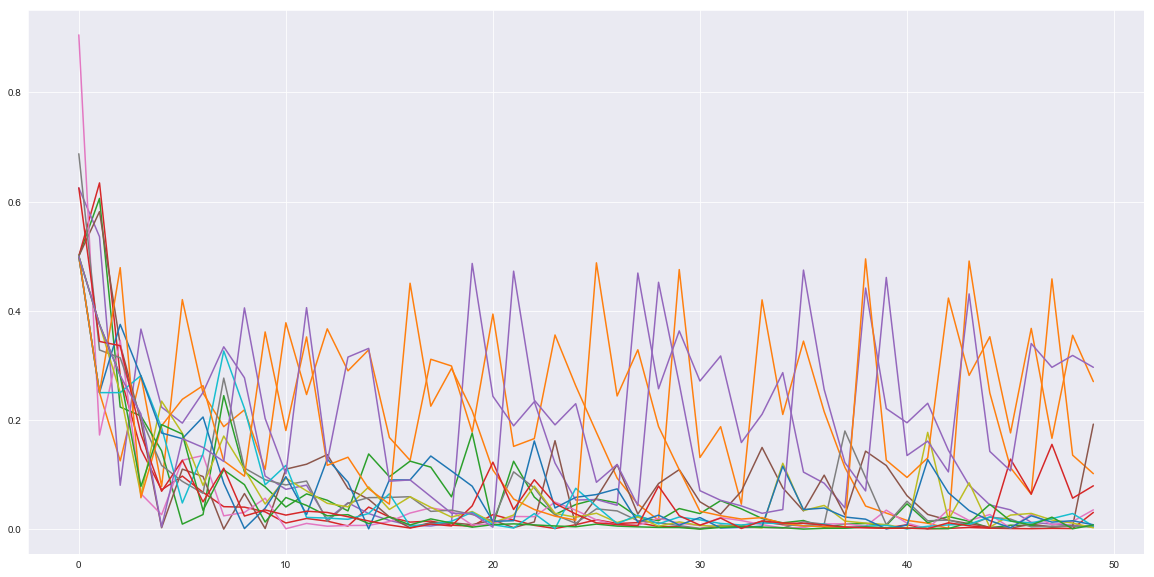

In [10]:
# gamma=0.5 alpha = 0.5
plt.figure(figsize = (20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)